Throughout this lesson, you've been trying different models on the same two datasets, wine and diabetes. Now, we're going to try our hand at accelerating this methodology by using AutoGluon. In this exercise, train two different AutonGluon models and see how they compare to previous iterations in exercise 1 and 2.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a AutoGluon Classifier model with these hyper parameters:
    1. time_limit: 120
    2. presets: best_quality
4. Output the model table summary
5. Evaluate the trained model on the test dataset
6. Load the diabetes dataset from scikit learn
7. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
8. Create a AutoGluon Regression model with these hyper parameters:
    1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
9. Output the model table summary
10. Evaluate the trained model on the test dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [1]:
# Install on base environment
# !conda install -c conda-forge mamba
# !mamba create -n automl python=3.9
# !mamba install -c conda-forge autogluon

In [2]:
# Install on new automl environment to avoid conflicts
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1

  Using cached pip-24.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
  Using cached setuptools-70.1.1-py3-none-any.whl.metadata (6.0 kB)
Using cached setuptools-70.1.1-py3-none-any.whl (883 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.5.1
    Uninstalling setuptools-69.5.1:
      Successfully uninstalled setuptools-69.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.0.0 requires nvidia-ml-py3==7.352.0, which is not installed.
autogluon-multimodal 1.0.0 requires omegaconf<2.3.0,>=2.1.1, but you have omegaconf 2.3.0 which is incompatible.
autogluon-timeseries 1.0.0 requires orjson~=3.9, but you have orjson 3.6.4 which is 

ImportError: dlopen(/anaconda3/envs/gptu/lib/python3.10/site-packages/libmambapy/bindings.cpython-310-darwin.so, 0x0002): Library not loaded: @rpath/libarchive.13.dylib
  Referenced from: <B697AD1E-0A10-36D4-9771-0D4770437EAA> /anaconda3/envs/gptu/lib/libmamba.2.0.0.dylib
  Reason: tried: '/anaconda3/envs/gptu/lib/libarchive.13.dylib' (no such file), '/anaconda3/envs/gptu/lib/python3.10/site-packages/libmambapy/../../../libarchive.13.dylib' (no such file), '/anaconda3/envs/gptu/lib/python3.10/site-packages/libmambapy/../../../libarchive.13.dylib' (no such file), '/anaconda3/envs/gptu/bin/../lib/libarchive.13.dylib' (no such file), '/anaconda3/envs/gptu/bin/../lib/libarchive.13.dylib' (no such file), '/usr/local/lib/libarchive.13.dylib' (no such file), '/usr/lib/libarchive.13.dylib' (no such file, not in dyld cache)

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

/Users/samuel/anaconda3/envs/automl/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## AutoGluon Classifier

In [4]:
# Load in the wine dataset
wine = datasets.load_wine()

In [6]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Include the target as well

df['target'] = wine.target

In [7]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up
predictor = TabularPredictor(
    label='target',
    path='wine',
).fit(
    df_train,
    presets='best_quality',
    time_limit=120,
)

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 120 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: wine/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 30s
AutoGluon will save models to "wine/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.19
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  

In [12]:
# Output the fit summary of the training run
print(predictor.fit_summary())

*** Summary of fit() ***
Estimated performance of each model:
                          model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        NeuralNetFastAI_BAG_L1   1.000000    accuracy       0.018806   2.466455                0.018806           2.466455            1       True          3
1           WeightedEnsemble_L2   1.000000    accuracy       0.019042   2.783795                0.000236           0.317340            2       True         21
2           WeightedEnsemble_L3   1.000000    accuracy       0.019044   2.872334                0.000238           0.405879            3       True         33
3                XGBoost_BAG_L2   1.000000    accuracy       0.328267  61.149189                0.010252           2.023117            2       True         30
4               CatBoost_BAG_L2   1.000000    accuracy       0.331985  65.197472                0.013970           6.071400            2       

/Users/samuel/anaconda3/envs/automl/lib/python3.9/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [14]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(df_test)

## AutoGluon Regression

In [15]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [17]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Include the target as well
dfd['target'] = diabetes.target

In [18]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2, random_state=42)

In [33]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a regression, autogluon will pick it up
predictor = TabularPredictor(
    label='target',
    eval_metric='r2',
    problem_type='regression',
    path='diabetes',
).fit(
    dfd_train,
    presets='best_quality',
    time_limit=120,
)

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 120 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: diabetes/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 30s
AutoGluon will save models to "diabetes/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.19
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: W

[1000]	valid_set's l2: 2496.78	valid_set's r2: 0.567332


	0.4928	 = Validation score   (r2)
	6.27s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 6.64s of the 16.62s of remaining time.
	0.4586	 = Validation score   (r2)
	0.2s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 6.39s of the 16.37s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.4872	 = Validation score   (r2)
	2.79s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 3.58s of the 13.56s of remaining time.
	0.4713	 = Validation score   (r2)
	0.19s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 3.35s of the 13.32s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.4679	 = Validation score   (r2)
	1.

[1000]	valid_set's l2: 3272.22	valid_set's r2: 0.273454


	0.4625	 = Validation score   (r2)
	8.49s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 74.85s of the 74.84s of remaining time.
	0.4347	 = Validation score   (r2)
	0.2s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 74.59s of the 74.59s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.483	 = Validation score   (r2)
	2.62s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 71.95s of the 71.94s of remaining time.
	0.4587	 = Validation score   (r2)
	0.19s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 71.7s of the 71.7s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.4569	 = Validation score   (r2)
	1

In [34]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                          model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L2   0.536553          r2       0.079814  59.668897                0.000238           0.228709            2       True         18
1     NeuralNetTorch_r79_BAG_L1   0.515079          r2       0.016545   6.980660                0.016545           6.980660            1       True         13
2         NeuralNetTorch_BAG_L1   0.504497          r2       0.013771   3.529145                0.013771           3.529145            1       True         10
3             LightGBMXT_BAG_L1   0.494924          r2       0.005099   6.499695                0.005099           6.499695            1       True          3
4               CatBoost_BAG_L1   0.482978          r2       0.006833   2.618607                0.006833           2.618607            1       

/Users/samuel/anaconda3/envs/automl/lib/python3.9/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBM_r131_BAG_L1': 'StackerEnsembleModel_LGB',
  'NeuralNetFastAI_r191_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'CatBoost_r9_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'LightGBM_r96_BAG_L1': 'StackerEnsembleModel

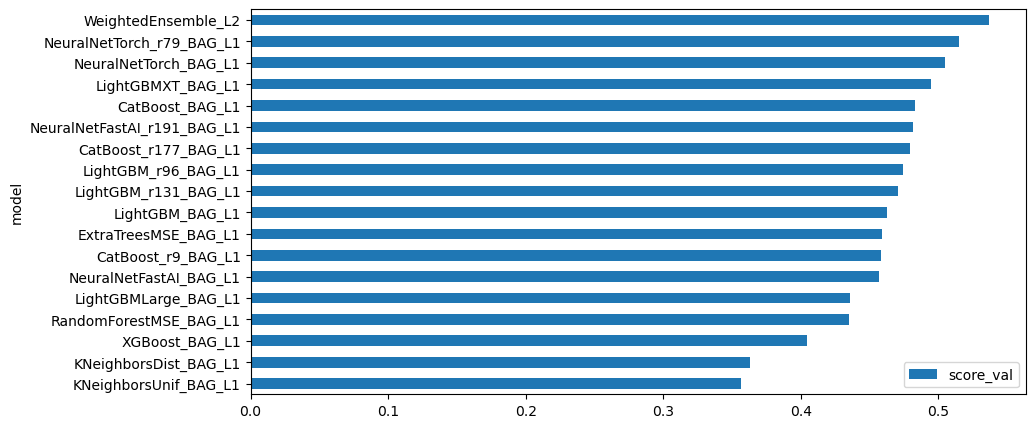

In [37]:
_ = predictor.leaderboard(silent=True).sort_values("score_val").plot(kind='barh', figsize=(10, 5), x='model', y='score_val')

In [36]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)
performance

{'r2': 0.5136036110248348,
 'root_mean_squared_error': -50.76417909038747,
 'mean_squared_error': -2577.0018787209324,
 'mean_absolute_error': -40.62051143003314,
 'pearsonr': 0.7203719115890477,
 'median_absolute_error': -30.189727783203125}

#  END OF NOTEBOOK